In [1]:
from pathlib import Path

import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

from src.path_download import PathDownload


# ---------- Youtube ID de un video ya descargado ----------
youtube_id = "ynPjt2_Rb4I"
# ---------- Youtube ID de un video ya descargado ----------


path_youtube = PathDownload(youtube_id=youtube_id)


- Load data

In [2]:
class AudioLibrosa:
    """
    - TODO: librosa.time_to_frames
    - TODO: librosa.time_to_samples
    """
    def __init__(self, *, path_audio: Path):
        self.path_audio = path_audio
        self.y, self.sr = librosa.load(self.path_audio, sr=None)
        self.tempo, self.beat_frames = librosa.beat.beat_track(y=self.y, sr=self.sr)

    def plot_wave(self):
        plt.figure(figsize=(20, 4))
        librosa.display.waveshow(self.y, sr=self.sr)
        plt.title("Forma de onda")
        plt.show()

    def plot_spectrogram(self):
        S = librosa.stft(self.y)
        S_db = librosa.amplitude_to_db(abs(S))
        plt.figure(figsize=(20, 10))
        librosa.display.specshow(S_db, sr=self.sr, x_axis="time", y_axis="log")
        plt.colorbar()
        plt.title("Espectrograma")
        plt.show()

    def _get_metronome(self):
        # Convertir beat frames a tiempos en segundos
        beat_times = librosa.frames_to_time(self.beat_frames, sr=self.sr)

        # Detectar el primer onset fuerte (inicio de la canción)
        onset_env = librosa.onset.onset_strength(y=self.y, sr=self.sr)
        onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=self.sr)
        first_onset_time = librosa.frames_to_time(onset_frames, sr=self.sr)[0]

        # Ajustar los tiempos del metrónomo
        adjusted_beat_times = beat_times - (beat_times[0] - first_onset_time)

        # Guardar el metrónomo como un click track
        click_track = librosa.clicks(times=adjusted_beat_times, sr=self.sr, length=len(self.y))

        # Guardar el audio combinado
        sf.write("metronome_synced.wav", click_track, self.sr)

        print(f"Tempo estimado: {self.tempo} BPM")
        print(f"Primer onset detectado en: {first_onset_time:.2f} s")

        S = librosa.stft(self.y)  # Transformada de Fourier de corta duración
        S_db = librosa.amplitude_to_db(abs(S))  # Convertir a escala logarítmica

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_db, sr=self.sr, x_axis="time", y_axis="log")
        plt.colorbar(label="Intensidad (dB)")
        plt.title("Espectrograma")
        plt.show()


audio_librosa = AudioLibrosa(path_audio=path_youtube.drums)

In [3]:
f"Tempo: {audio_librosa.tempo}"

'Tempo: [114.84375]'

In [4]:
audio_librosa.beat_frames

array([  190,   236,   280,   325,   371,   419,   464,   509,   555,
         601,   647,   692,   737,   782,   830,   875,   921,   966,
        1012,  1057,  1103,  1148,  1194,  1239,  1286,  1329,  1376,
        1422,  1467,  1513,  1558,  1603,  1648,  1694,  1740,  1785,
        1830,  1876,  1921,  1966,  2011,  2056,  2102,  2147,  2193,
        2238,  2283,  2328,  2373,  2417,  2463,  2508,  2553,  2597,
        2643,  2688,  2734,  2779,  2824,  2869,  2914,  2959,  3006,
        3050,  3095,  3140,  3186,  3232,  3277,  3321,  3367,  3411,
        3457,  3501,  3547,  3592,  3638,  3683,  3729,  3773,  3819,
        3863,  3909,  3953,  3999,  4043,  4090,  4135,  4180,  4224,
        4269,  4315,  4358,  4404,  4449,  4494,  4541,  4588,  4633,
        4681,  4726,  4772,  4818,  4863,  4909,  4954,  5001,  5046,
        5092,  5139,  5183,  5231,  5275,  5321,  5367,  5412,  5456,
        5502,  5548,  5592,  5638,  5683,  5729,  5774,  5819,  5863,
        5910,  5955,

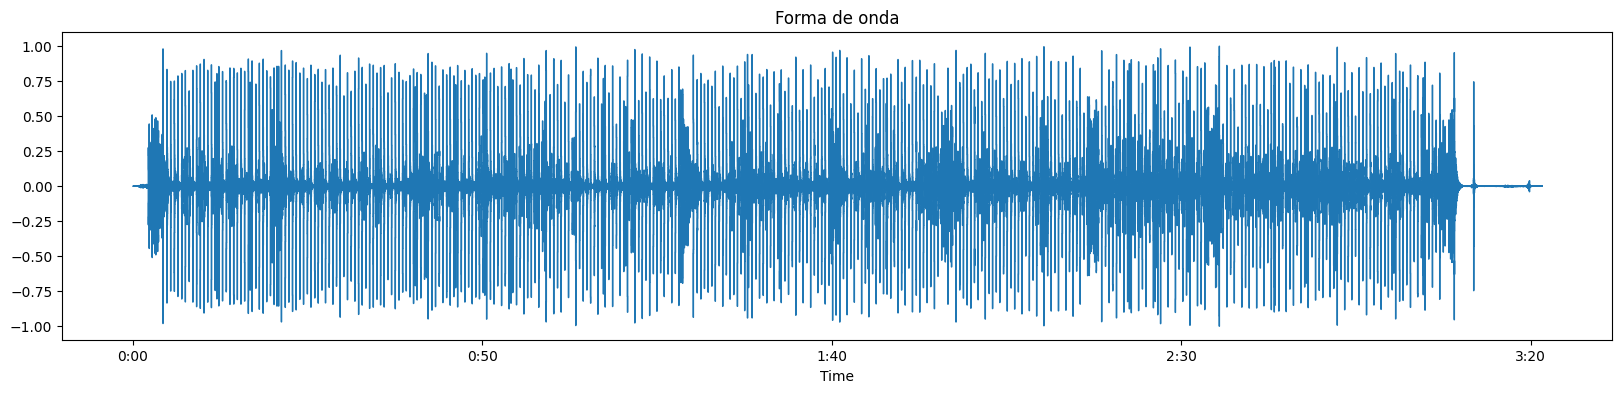

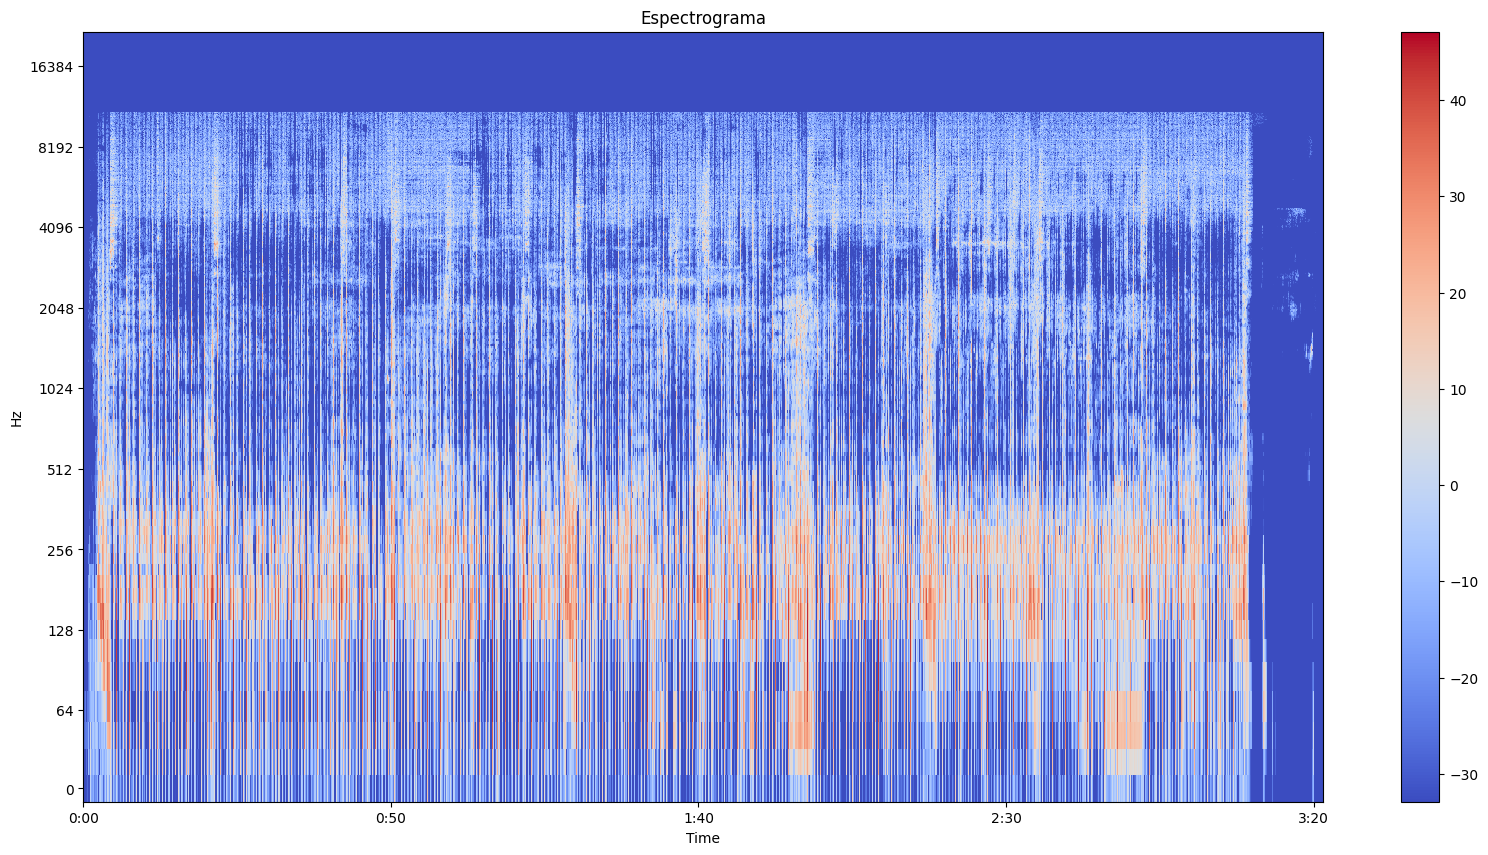

In [5]:
audio_librosa.plot_wave()
audio_librosa.plot_spectrogram()